In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用patsy便于生成模型
import patsy

# 2.1 What Is Statistical Learning?

In [3]:
Advertising = pd.read_csv("data/Advertising.csv").drop('Unnamed: 0',axis = 1)
Advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**FIGURE 2.1**

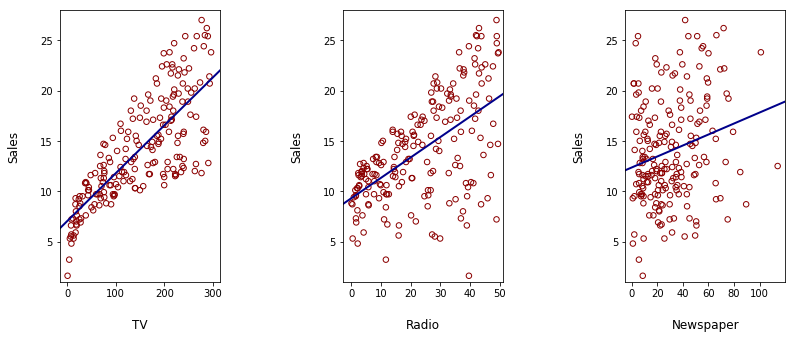

In [4]:
fig = plt.figure(figsize=(13,5))
# 利用网格确定图形的位置
from matplotlib.gridspec import GridSpec
gs = GridSpec(12, 13) 
ax1 = fig.add_subplot(gs[:, :3])
y = Advertising['sales']
x = Advertising['TV']
results = smf.ols('sales ~ TV',data = Advertising).fit()
x_draw = pd.DataFrame(np.linspace(-50,350,10),columns = ['TV'])
plt.plot(x_draw,results.predict(x_draw),color = 'darkblue',linewidth = 2)
plt.scatter(x,y,marker='o',s=30,color = '',edgecolor = 'darkred')
plt.xlim(-15,315)
plt.ylim(1,28)
plt.xlabel('TV' ,fontsize=12,labelpad=20)
plt.ylabel('Sales' ,fontsize=12,labelpad=20)
ax2 = fig.add_subplot(gs[:, 5:8])
x = Advertising['radio']
results = smf.ols('sales ~ radio',data = Advertising).fit()
x_draw = pd.DataFrame(np.linspace(-10,60,10),columns = ['radio'])
plt.plot(x_draw,results.predict(x_draw),color = 'darkblue',linewidth = 2)
plt.scatter(x,y,marker='o',s=30,color = '',edgecolor = 'darkred')
plt.xlim(-3,51)
plt.ylim(1,28)
plt.xticks(np.linspace(0,50,6))
plt.xlabel('Radio' ,fontsize=12,labelpad=20)
plt.ylabel('Sales' ,fontsize=12,labelpad=20)
ax3 = fig.add_subplot(gs[:, 10:13])
x = Advertising['newspaper']
results = smf.ols('sales ~ newspaper',data = Advertising).fit()
x_draw = pd.DataFrame(np.linspace(-10,150,10),columns = ['newspaper'])
plt.plot(x_draw,results.predict(x_draw),color = 'darkblue',linewidth = 2)
plt.scatter(x,y,marker='o',s=30,color = '',edgecolor = 'darkred')
plt.xlim(-5,120)
plt.ylim(1,28)
plt.xticks(np.linspace(0,100,6))
plt.xlabel('Newspaper' ,fontsize=12,labelpad=20)
plt.ylabel('Sales' ,fontsize=12,labelpad=20)
plt.show()